# Unit Tests for the ancIBD pip package
Run these before uploading a new version of package on pip. To ensure everything works as intented.

In [1]:
import sys as sys
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import os as os

### The following code gives nice and clean Arial font on your plots
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']

### The following Code sets the working directory to your ancIBD code
# If using system ancIBD installation comment out:
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path

### Test key imports of ancIBD

In [2]:
from ancIBD.IO.prepare_h5 import vcf_to_1240K_hdf
from ancIBD.run import hapBLOCK_chroms, hapBLOCK_chrom, hapBLOCK_chroms_mixedPloidy
from ancIBD.run import run_plot_pair, run_plot_pair_IBD2, run_plot_pair_X
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df
from ancIBD.plot.plot_karyotype import plot_pde_individual_from_ibd_df

# A) Preparing an HDF5 from HDF5
Test whether creating the data works

In [3]:
%%time
ch = 3

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
vcf_to_1240K_hdf(in_vcf_path = base_path + f"notebook/vignette/data/vcf.raw/example_hazelton_chr{ch}.vcf.gz",
                 path_vcf = base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.vcf",
                 path_h5 =  base_path + f"output/dumpster/unittests/example_hazelton_chr{ch}.h5",
                 marker_path = base_path + f"notebook/vignette/data/filters/snps_bcftools_ch{ch}.csv",
                 map_path = base_path + f"notebook/vignette/data/map/v51.1_1240k.snp", 
                 af_path = base_path + f"notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv",
                 col_sample_af = "", 
                 buffer_size=20000, chunk_width=8, chunk_length=20000,
                 ch=ch)

print(f"Finished running chromosome {ch}")

Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr3.vcf -T /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/filters/snps_bcftools_ch3.csv -M2 -v snps /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/vcf.raw/example_hazelton_chr3.vcf.gz
Finished BCF tools filtering to target markers.
Deleting previous HDF5 file at path_h5: /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr3.h5...
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 77345 variants.
Loaded 6 individuals.
Loaded 81416 Chr.3 1240K SNPs.
Intersection 77013 out of 77345 HDF5 SNPs
Interpolating 332 variants.
Finished Chromosome 3.
Adding map to HDF5...
Intersection 77013 out of 77345 target HDF5 SNPs. 332 SNPs set to AF=0.5
Transformation complete! Find new hdf5 file at: /n/groups/reich/hr

# B) Running ancIBD
Test whether running on the data works and calls correct IBD

In [4]:
%%time
df_ibd = hapBLOCK_chroms(folder_in='/n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/example_hazelton_chr',
                         iids=["I12440", "I12438"], run_iids=[],
                         ch=3, folder_out='',
                         output=False, prefix_out='', logfile=False,
                         l_model='h5', e_model='haploid_gl', h_model='FiveStateScaled', t_model='standard',
                         ibd_in=1, ibd_out=10, ibd_jump=400,
                         min_cm=6, cutoff_post=0.99, max_gap=0.0075)

m = np.max(df_ibd["lengthM"])
assert(np.isclose(m, 0.658, atol=0.01))
print("Test Successful.")

Test Successful.
CPU times: user 160 ms, sys: 9.97 ms, total: 170 ms
Wall time: 181 ms


# C) Plotting the data
Test whether the plotting functions work

Filtering to 0.99 GP variants: 0.954x
Filtering to 0.99 GP variants: 0.848x
Filtering to common GP variants: 0.827x
Plotting 69063 markers
Saved to /n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png


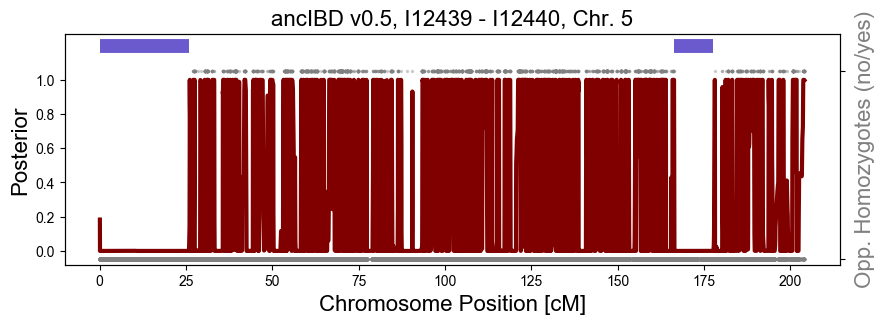

Test Successful.


In [5]:
iids = ["I12439", "I12440"]	

run_plot_pair(iids=iids, ch=5, plot=True, xlim=[],
              path_h5 = "/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch" ,
              min_cm=6, p_col='variants/AF_ALL', ms=1.5, fs_l=16, figsize=(10,3),
              path_fig="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png")
print("Test Successful.")

### Test Karyotype Plot

Found: 7 Pairs fitting in dataframe.

Saved figure to /n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png


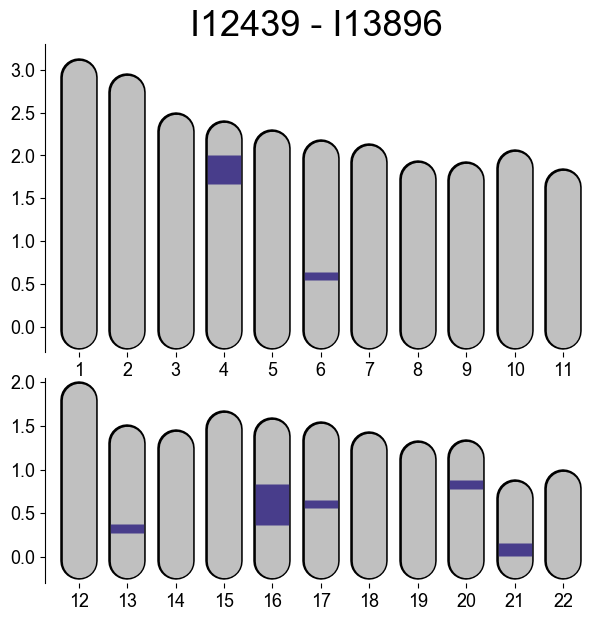

Test Successful.


In [6]:
path_ibd = "/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v51.1.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

plot_karyo_from_ibd_df(df_ibd, iids=["I12439", "I13896"], min_cm=8, 
                       savepath="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/karyo.png",
                       title = "I12439 - I13896")
print("Test Successful.")

### Test IBD Distribution

Found: 18 Pairs fitting in dataframe.

Saved to /n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/ibd_histo.png.


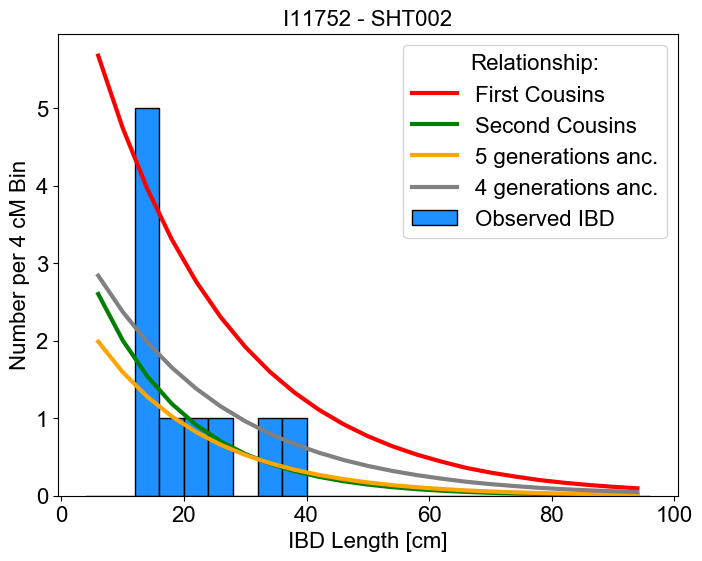

Test Successful.


In [7]:
path_ibd = "/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v51.1.tsv"
df_ibd = pd.read_csv(path_ibd, sep="\t")

plot_pde_individual_from_ibd_df(df_ibd, iids=["I11752", "SHT002"],
                                savepath="/n/groups/reich/hringbauer/git/hapBLOCK/figs/dumpster/unittests/ibd_histo.png", 
                                title="I11752 - SHT002", comm_ancs=[4, 4, 2, 2], ms=[4, 6, 5, 4],
                                labels=['First Cousins', 'Second Cousins', '5 generations anc.', '4 generations anc.'],)
print("Test Successful.")

# D) Test bash functionality of ancIBD

### D1) Run ancIBD from VCF file
Test run on chromosome 20. Converts vcf to ancIBD hdf5, and then runs ancIBD.

In [8]:
!ancIBD-run -h
print("Test Successful.")

usage: ancIBD-run [-h] [--vcf VCF] [--h5 H5] --ch CH
                  [--marker_path MARKER_PATH] [--map_path MAP_PATH]
                  [--af_path AF_PATH] [--af_column AF_COLUMN] [--out OUT]
                  [--prefix PREFIX] [--ibd-in IBD_IN] [--ibd-out IBD_OUT]
                  [--min MIN] [--iid IID] [--pair PAIR] [--IBD2]
                  [--post2 POST2] [--min_cm2_init MIN_CM2_INIT]
                  [--min_cm2_after_merge MIN_CM2_AFTER_MERGE] [--mask MASK]
                  [-v]

Run ancIBD (on Autosomes).

optional arguments:
  -h, --help            show this help message and exit
  --vcf VCF             path to the imputed vcf file
  --h5 H5               path to hdf5 file. If specified, ancIBD will skip the
                        vcf to hdf5 conversion step. Only one of --vcf and
                        --h5 should be specified. But please make sure that
                        the hdf5 file has suffix ch{chromosome number}.h5
                        (e.g, test.ch20.h5

In [9]:
%%time

ch = 3
base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
path_vcf = base_path + f"notebook/vignette/data/vcf.raw/example_hazelton_chr{ch}.vcf.gz"
marker_path = base_path + f"notebook/vignette/data/filters/snps_bcftools_ch{ch}.csv"
map_path = base_path + f"notebook/vignette/data/map/v51.1_1240k.snp"
af_path = base_path + f"notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv"
out_path = base_path + f"output/dumpster/unittests/bash"

!ancIBD-run --vcf $path_vcf --ch $ch --out $out_path --marker_path $marker_path --map_path $map_path --af_path $af_path --prefix example_hazelton

### Check output
df_ibd = pd.read_csv(os.path.join(out_path, f"example_hazelton.ch{ch}.tsv"), sep="\t")
idx = (df_ibd["iid1"] == "I12440") & (df_ibd["iid2"] == "I12438")
m = np.max(df_ibd["lengthM"][idx])
assert(np.isclose(m, 0.658, atol=0.01))
print("Test Successful.")

Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/bash/example_hazelton.ch3.1240k.vcf -T /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/filters/snps_bcftools_ch3.csv -M2 -v snps /n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/vcf.raw/example_hazelton_chr3.vcf.gz
Finished BCF tools filtering to target markers.
Deleting previous HDF5 file at path_h5: /n/groups/reich/hringbauer/git/hapBLOCK/output/dumpster/unittests/bash/example_hazelton.ch3.h5...
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 77345 variants.
Loaded 6 individuals.
Loaded 81416 Chr.3 1240K SNPs.
Intersection 77013 out of 77345 HDF5 SNPs
Interpolating 332 variants.
Finished Chromosome 3.
Adding map to HDF5...
Intersection 77013 out of 77345 target HDF5 SNPs. 332 SNPs set to AF=0.5
Transformation complete! Find new hdf5 file at: /n/g

### D2) Run from H5
Run ancIBD via bash directly from H5

In [10]:
%%time

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK/"
path_h5 = base_path + "output/dumpster/unittests/bash/example_hazelton.ch20.h5"
marker_path = base_path + "notebook/vignette/data/filters/snps_bcftools_ch20.csv"
map_path = base_path + "notebook/vignette/data/map/v51.1_1240k.snp"
af_path = base_path + "notebook/vignette/data/afs/v51.1_1240k_AF_ch20.tsv"
out_path = base_path + f"output/dumpster/unittests/bash"

!ancIBD-run --h5 $path_h5 --ch 20 --out $out_path --marker_path $marker_path --map_path $map_path --af_path $af_path --prefix example_hazelton1
print("Test Successful.")

Test Successful.
CPU times: user 158 ms, sys: 36 ms, total: 194 ms
Wall time: 5.98 s


## E) ancIBD2

### Visualize ancIBD2

In [ ]:
run_plot_pair_IBD2(path_h5="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch",
                  iids = ["I24494", "I24193"], ch=11, xlim=[], plot=True)

In [12]:
%%time

df_ibd, _, _ = hapBLOCK_chrom(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v51.1/ch",
                         iids=["I24494", "I24193"], ch=11, folder_out='',
                         output=False, prefix_out='', logfile=False, 
                         l_model='h5', h_model='FiveStateScaled', IBD2=True)

df_ibd2 = df_ibd[df_ibd["segment_type"]=="IBD2"]


m = np.max(df_ibd2["lengthM"])
assert(np.isclose(m, 0.265, atol=0.01))

print("Test Successful.")

Test Successful.
CPU times: user 692 ms, sys: 12.9 ms, total: 705 ms
Wall time: 717 ms


## F) IBDX

### Run IBD X

In [13]:
df_ibd = hapBLOCK_chroms_mixedPloidy(
    folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
    iids=['GRG029', 'GRG036'], ploidy=(1, 1), ch='X',
    output=True, logfile=False, p_col='variants/RAF',
    ibd_in=1, ibd_out=10, ibd_jump=400,
    min_cm=2, cutoff_post=0.99, max_gap=0.0075, mask='')

m = np.max(df_ibd["lengthM"])
assert(np.isclose(m, 0.78, atol=0.01))
print("Test Successful.")

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Minimum Genetic Map: 0.2574 Morgan
Maximum Genetic Map: 2.0170 Morgan
Gaps bigger than 0.1 cM: 208
Maximum Gap: 0.9164 cM
Upper Gap Cutoff: 5.0000 cM
Memory Usage at end of HMM:
Memory Usage: 541.10208 mB
Fraction Markers above IBD cutoff: 0.7729
Merged n=1 gaps < 0.0075 M
Called n=3 IBD Blocks > 2 cM
Longest Block: 77.93 cM
Test Successful.


In [31]:
df_ibd

,Start,End,StartM,EndM,length,lengthM,ch,StartBP,EndBP,iid1,iid2
0,0,9598,0.257405,0.626573,9598,0.369168,X,5000892,29893117,GRG029,GRG036
1,12571,13217,0.764497,0.790042,646,0.025545,X,35998358,38038953,GRG029,GRG036
2,27746,46587,1.237642,2.016961,18841,0.779319,X,97666876,154899846,GRG029,GRG036


### Visualize IBD X

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 2595


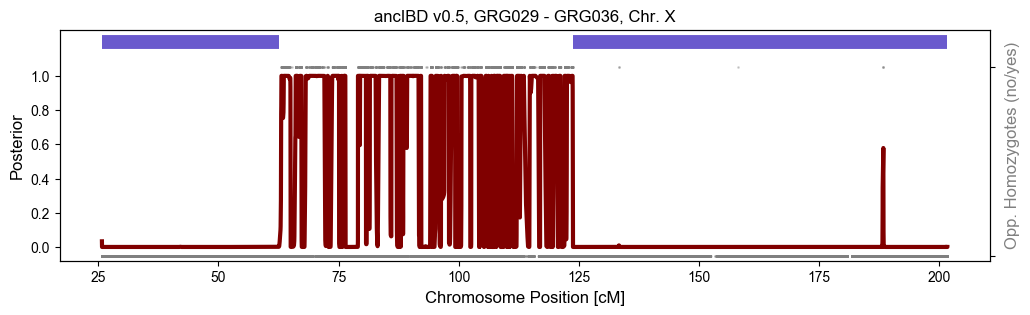

CPU times: user 489 ms, sys: 18.1 ms, total: 507 ms
Wall time: 520 ms


In [14]:
%%time
run_plot_pair_X(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
                iids = ['GRG029', 'GRG036'], ploidy=(1, 1),
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)

Thresholding GP at 0.999
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 8


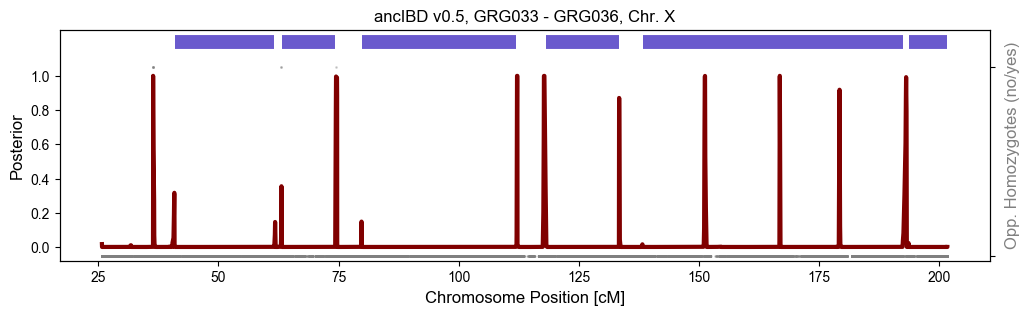

In [17]:
run_plot_pair_X(folder_in="/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/ancIBDX/Gurgy_quintet.ch",
                iids = ['GRG033', 'GRG036'], ploidy=(2, 1),
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)

### Test ancIBDX bash intallation

In [18]:
!ancIBDX -h
print("Test Successful.")

usage: ancIBDX [-h] [--vcf VCF] [--h5 H5] [--ch CH]
               [--marker_path MARKER_PATH] [--map_path MAP_PATH]
               [--af_path AF_PATH] [--af_column AF_COLUMN] [--out OUT]
               [--prefix PREFIX] [--ibd-in IBD_IN] [--ibd-out IBD_OUT]
               [--ibd-jump IBD_JUMP] [--min MIN] --ploidy PLOIDY [--pair PAIR]
               [--mask MASK] [--bin BIN] [--snpcm SNPCM] [-v]

Run ancIBD (on Autosomes).

optional arguments:
  -h, --help            show this help message and exit
  --vcf VCF             path to the imputed vcf file
  --h5 H5               path to hdf5 file. If specified, ancIBD will skip the
                        vcf to hdf5 conversion step. Only one of --vcf and
                        --h5 should be specified. But please make sure that
                        the hdf5 file has suffix ch{chromosome number}.h5
                        (e.g, test.ch20.h5).
  --ch CH               chromosome name, default by X.
  --marker_path MARKER_PATH
           